# เตรียมข้อมูล

In [87]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [88]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [89]:
orig_df = pd.read_excel("clust_data60.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,10465.1,71491.8,84646.4,225910,13502.7,406016
1,สำนักนายกรัฐมนตรี,3894,2853.3,4777.3,9458.4,14429.3,35412.3
2,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9
3,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6
4,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6
5,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401,952.7,4419.3,219.1,11660
7,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4
8,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435,33721


In [90]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,3894,2853.3,4777.3,9458.4,14429.3,35412.3
2,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9
3,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6
4,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6
5,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401,952.7,4419.3,219.1,11660
7,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4
8,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435,33721
10,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2


In [91]:
orig_df.to_csv(r'clustering_data60.csv', index = False, header=True)

# Kmean

In [92]:
df = pd.read_csv("clustering_data60.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0
8,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2


<AxesSubplot:>

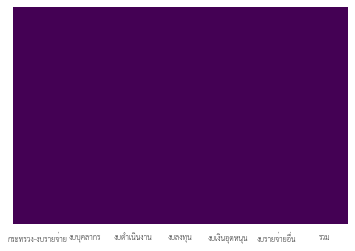

In [93]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [94]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,27164.845000,7248.370000,15415.080000,25388.180000,17547.780000,92764.255000
std,60432.097648,9593.707286,31699.380583,65047.467176,46181.897481,135449.048499
min,402.300000,338.400000,411.800000,24.700000,219.100000,2053.000000
25%,2003.900000,1037.550000,616.725000,611.175000,907.925000,7609.875000
50%,3674.400000,2721.750000,2472.300000,2088.550000,1625.150000,28635.900000
75%,13334.425000,9943.375000,14691.800000,7325.975000,4162.550000,135760.725000
max,258020.800000,36824.800000,137892.700000,246083.200000,195927.600000,513410.000000


In [95]:
ddf = df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
ddf.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2131.1,775.0,1816.6,1495.5,1168.7
16,402.3,338.4,620.9,8922.8,1218.4
17,258020.8,36824.8,33810.3,175509.7,9244.4
18,89008.3,14573.1,20126.3,6793.7,262.9
19,1622.3,638.9,586.5,575.7,2243.4


จะไม่ตัด Outlier ออกเนื่องจากต้องการเทียบทุกกระทรวง

In [96]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(ddf)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.395078,-0.470021,-0.344301,-0.251257,-0.069280
1,1.080991,1.981045,-0.227101,-0.344663,1.496412
2,-0.257211,-0.113303,-0.390701,-0.396675,3.962891
3,-0.410300,-0.498158,-0.479367,-0.382347,-0.359393
4,-0.437005,-0.656059,-0.445257,-0.394049,-0.346590


In [97]:
df_normalized.describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.053113e-17,3.885781e-17,8.049117e-17,4.440892e-17,-7.216450e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-4.543577e-01,-7.389719e-01,-4.855944e-01,-4.000522e-01,-3.849744e-01
25%,-4.271668e-01,-6.642028e-01,-4.789618e-01,-3.908019e-01,-3.696715e-01
50%,-3.988061e-01,-4.840896e-01,-4.189045e-01,-3.674996e-01,-3.537376e-01
75%,-2.348042e-01,2.882115e-01,-2.340959e-02,-2.848909e-01,-2.973667e-01
max,3.919328e+00,3.162988e+00,3.964096e+00,3.480970e+00,3.962891e+00


C:\Users\PPUNN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

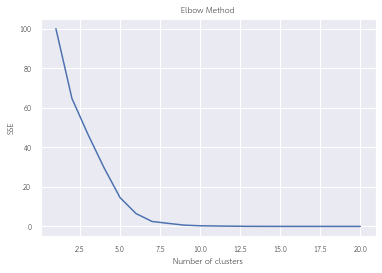

In [98]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

จากกราฟพบว่าค่า k วัดจากจุดที่เปลี่ยนแปลงความชันมากที่สุดอยู่ที่ประมาณ 6

In [99]:
k = 6

In [100]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [101]:
cluster_predictions = kmeans.predict(df_normalized)
ddf['cluster_id'] = cluster_predictions
ddf.tail(10)

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_10584/579068457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,783.7,542.2,451.3,24.7,251.1,0
11,2215.6,1969.0,411.8,623.0,1815.3,0
12,17293.9,12809.2,29055.5,246083.2,27566.7,5
13,8618.7,8988.1,3128.0,931.0,1885.0,0
14,3454.8,1700.3,461.9,40695.9,878.0,0
15,2131.1,775.0,1816.6,1495.5,1168.7,0
16,402.3,338.4,620.9,8922.8,1218.4,0
17,258020.8,36824.8,33810.3,175509.7,9244.4,1
18,89008.3,14573.1,20126.3,6793.7,262.9,3
19,1622.3,638.9,586.5,575.7,2243.4,0


In [102]:
ddf.cluster_id.value_counts()

0    13
3     3
2     1
4     1
5     1
1     1
Name: cluster_id, dtype: int64

## silhouette_score

In [103]:
print(metrics.silhouette_score(ddf,kmeans.labels_))

0.546173495438453


silhouette_score ยิ่งใกล้เคียง 1 ยิ่งแม่นยำ

## davies_bouldin_score

In [104]:
print(metrics.davies_bouldin_score(ddf,kmeans.labels_))

0.4504695576485253


davies_bouldin_score ยิ่งใกล้เคียง 0 ยิ่งแม่นยำ

## 5 Clusters

#### Cluster 0

In [105]:
ddf[ddf.cluster_id==0].mean()

งบบุคลากร        3218.869231
งบดําเนินงาน     2494.730769
งบลงทุน          2256.000000
งบเงินอุดหนุน    5629.784615
งบรายจ่ายอื่น    2409.953846
cluster_id          0.000000
dtype: float64

In [106]:
df[ddf.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0
8,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2
10,กระทรวงพลังงาน,783.7,542.2,451.3,24.7,251.1,2053.0
11,กระทรวงพาณิชย์,2215.6,1969.0,411.8,623.0,1815.3,7034.7
13,กระทรวงยุติธรรม,8618.7,8988.1,3128.0,931.0,1885.0,23550.8
14,กระทรวงเเรงงาน,3454.8,1700.3,461.9,40695.9,878.0,47190.9


#### Cluster 1

In [107]:
ddf[ddf.cluster_id==1].mean()

งบบุคลากร        258020.8
งบดําเนินงาน      36824.8
งบลงทุน           33810.3
งบเงินอุดหนุน    175509.7
งบรายจ่ายอื่น      9244.4
cluster_id            1.0
dtype: float64

In [108]:
df[ddf.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
17,กระทรวงศึกษาธิการ,258020.8,36824.8,33810.3,175509.7,9244.4,513410.0


#### Cluster 2

In [109]:
ddf[ddf.cluster_id==2].mean()

งบบุคลากร         12014.6
งบดําเนินงาน       6188.9
งบลงทุน            3343.7
งบเงินอุดหนุน       238.8
งบรายจ่ายอื่น    195927.6
cluster_id            2.0
dtype: float64

In [110]:
df[ddf.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6


#### Cluster 3

In [111]:
ddf[ddf.cluster_id==3].mean()

งบบุคลากร        68291.133333
งบดําเนินงาน     18122.833333
งบลงทุน          24957.133333
งบเงินอุดหนุน     4094.133333
งบรายจ่ายอื่น    28695.300000
cluster_id           3.000000
dtype: float64

In [112]:
df[ddf.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4
18,กระทรวงสาธารณสุข,89008.3,14573.1,20126.3,6793.7,262.9,130764.3


#### Cluster 4

In [113]:
ddf[ddf.cluster_id==4].mean()

งบบุคลากร          9248.9
งบดําเนินงาน       2344.5
งบลงทุน          137892.7
งบเงินอุดหนุน       462.3
งบรายจ่ายอื่น       801.6
cluster_id            4.0
dtype: float64

In [114]:
df[ddf.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0


#### Cluster 5

In [115]:
ddf[ddf.cluster_id==5].mean()

งบบุคลากร         17293.9
งบดําเนินงาน      12809.2
งบลงทุน           29055.5
งบเงินอุดหนุน    246083.2
งบรายจ่ายอื่น     27566.7
cluster_id            5.0
dtype: float64

In [116]:
df[ddf.cluster_id==5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
12,กระทรวงมหาดไทย,17293.9,12809.2,29055.5,246083.2,27566.7,332808.5


## Export

In [117]:
show = pd.concat([df, ddf], axis=1, join="inner")
show

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3,3894.0,2853.3,4777.3,9458.4,14429.3,0
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9,90837.3,25772.7,8398.4,3536.4,84905.1,3
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6,12014.6,6188.9,3343.7,238.8,195927.6,2
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6,2997.4,2590.2,604.2,1147.2,1370.6,0
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4,1424.4,1113.7,1658.1,405.3,1946.9,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0,2667.9,3401.0,952.7,4419.3,219.1,0
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4,25027.8,14022.7,46346.7,1952.3,917.9,3
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0,9248.9,2344.5,137892.7,462.3,801.6,4
8,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0,10468.6,6712.3,12880.3,2224.8,1435.0,0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2,1164.5,809.1,978.4,2263.6,2468.6,0


In [118]:
show.sort_values(by=["cluster_id"])

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3,3894.0,2853.3,4777.3,9458.4,14429.3,0
16,กระทรวงวิทยาศาสตร์และเทคโนโลยี,402.3,338.4,620.9,8922.8,1218.4,11502.8,402.3,338.4,620.9,8922.8,1218.4,0
15,กระทรวงวัฒนธรรม,2131.1,775.0,1816.6,1495.5,1168.7,7386.9,2131.1,775.0,1816.6,1495.5,1168.7,0
14,กระทรวงเเรงงาน,3454.8,1700.3,461.9,40695.9,878.0,47190.9,3454.8,1700.3,461.9,40695.9,878.0,0
13,กระทรวงยุติธรรม,8618.7,8988.1,3128.0,931.0,1885.0,23550.8,8618.7,8988.1,3128.0,931.0,1885.0,0
11,กระทรวงพาณิชย์,2215.6,1969.0,411.8,623.0,1815.3,7034.7,2215.6,1969.0,411.8,623.0,1815.3,0
10,กระทรวงพลังงาน,783.7,542.2,451.3,24.7,251.1,2053.0,783.7,542.2,451.3,24.7,251.1,0
8,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0,10468.6,6712.3,12880.3,2224.8,1435.0,0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2,1164.5,809.1,978.4,2263.6,2468.6,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0,2667.9,3401.0,952.7,4419.3,219.1,0


In [119]:
show2 = ddf[ddf.cluster_id==0].mean()
for i in range(k-1):
    show2 = pd.concat([show2, ddf[ddf.cluster_id==(i+1)].mean()], axis=1, join="inner")



In [120]:
show2

,0,1,0,0,0,0
งบบุคลากร,3218.869231,258020.8,12014.6,68291.133333,9248.9,17293.9
งบดําเนินงาน,2494.730769,36824.8,6188.9,18122.833333,2344.5,12809.2
งบลงทุน,2256.000000,33810.3,3343.7,24957.133333,137892.7,29055.5
งบเงินอุดหนุน,5629.784615,175509.7,238.8,4094.133333,462.3,246083.2
งบรายจ่ายอื่น,2409.953846,9244.4,195927.6,28695.300000,801.6,27566.7
cluster_id,0.000000,1.0,2.0,3.000000,4.0,5.0
